# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import requests
import os
from citipy import citipy
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import random
from keys import weather_api_key
from pprint import pprint

## Generate Cities List

In [90]:
cityDF = pd.DataFrame()
while cityDF.shape[0] < 500:
    location,city = random.choice(list(citipy.WORLD_CITIES_DICT.items()))
    cityDict={"City":city.city_name,"Country":city.country_code,"Lat":location[0],"Lng":location[1]}
    
    cityDF=cityDF.append(cityDict,ignore_index=True)
    cityDF.drop_duplicates(inplace=True)
    
    




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
cityDF = pd.DataFrame()
index=0
while cityDF.shape[0] < 500:
    location,city = random.choice(list(citipy.WORLD_CITIES_DICT.items()))
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    name = city.city_name
    country=city.country_code
    units = "imperial"
    query_url = url + "appid=" + weather_api_key + "&q=" + name +","+country+"&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    if weather_json=={'cod': '404', 'message': 'city not found'}:
        print("City not found")
        continue
    maxTemp=weather_json["main"]["temp_max"]
    humid=weather_json["main"]["humidity"]
    clouds=weather_json["clouds"]["all"]
    wind=weather_json["wind"]["speed"]
    date=weather_json["dt"]
    
    index=index+1
    print(f"Processing {name} city number {index}")
    
    cityDict={"City":name,"Country":country,"Lat":location[0],"Lng":location[1],"Max Temp":maxTemp,"Humidity":humid,"Cloudiness":clouds,"Wind Speed":wind,"Date":date}    
    cityDF=cityDF.append(cityDict,ignore_index=True)
    
    cityDF.drop_duplicates(subset=["City","Country","Lat","Lng"],inplace=True)

Processing huamachuco city number 1
Processing shebunino city number 2
Processing tuensang city number 3
Processing tollose city number 4
City not found
Processing ejido hermosillo city number 5
Processing sao jose do belmonte city number 6
City not found
Processing bantilan city number 7
Processing czechowice-dziedzice city number 8
Processing castlewood city number 9
Processing same city number 10
Processing bam city number 11
Processing banawang city number 12
Processing danielskuil city number 13
Processing tarui city number 14
Processing libin city number 15
Processing kondopoga city number 16
Processing regensdorf city number 17
Processing winchester city number 18
Processing ebikon city number 19
Processing encs city number 20
Processing pachperwa city number 21
Processing tlanalapa city number 22
Processing gremyachinsk city number 23
Processing shirone city number 24
Processing chanute city number 25
Processing sekudai city number 26
Processing pujehun city number 27
Processin

Processing san fernando city number 223
Processing essenbach city number 224
Processing szentlorinc city number 225
City not found
Processing kitzbuhel city number 226
Processing fuquay-varina city number 227
Processing kamskiye polyany city number 228
Processing malawag city number 229
Processing laerdalsoyri city number 230
Processing tapioszecso city number 231
Processing bihar city number 232
Processing dolton city number 233
Processing nenton city number 234
Processing belleville city number 235
Processing manacsac city number 236
Processing zhireken city number 237
Processing tuli city number 238
Processing eseka city number 239
Processing trakai city number 240
Processing songkhla city number 241
Processing shijak city number 242
Processing junqueiro city number 243
Processing nanding city number 244
Processing luze city number 245
Processing rodbyhavn city number 246
Processing kostelec nad orlici city number 247
Processing wanaka city number 248
City not found
Processing hidal

Processing middletown city number 441
Processing danville city number 442
Processing sorel city number 443
Processing chamba city number 444
Processing new castle city number 445
Processing parambu city number 446
Processing elati city number 447
Processing nahariyya city number 448
Processing ozora city number 449
Processing pagsanjan city number 450
Processing hudiksvall city number 451
Processing agigea city number 452
Processing iwatsuki city number 453
Processing purnia city number 454
Processing budogoshch city number 455
Processing hicksville city number 456
Processing colotlan city number 457
Processing del monte city number 458
Processing tambo city number 459
Processing albi city number 460
Processing catia la mar city number 461
Processing esmoriz city number 462
Processing dartford city number 463
City not found
Processing torshavn city number 464
Processing sasebo city number 465
Processing belleville city number 466
Processing koluszki city number 467
Processing tarrafal 

In [4]:
cityDF.shape

(500, 9)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
file = os.path.join("City_Weather.csv")
cityDF.to_csv(file, index=False, header=True)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
cityDF[cityDF["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

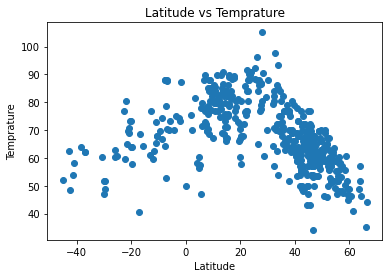

In [16]:
plt.scatter(cityDF["Lat"],cityDF["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Latitude vs Temprature")
file = os.path.join("Latitude_vs_Temprature.png")
plt.savefig(file)

## Latitude vs. Humidity Plot

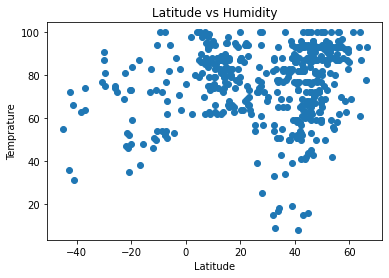

In [17]:
plt.scatter(cityDF["Lat"],cityDF["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Latitude vs Humidity")
file = os.path.join("Latitude_vs_Humidity.png")
plt.savefig(file)

## Latitude vs. Cloudiness Plot

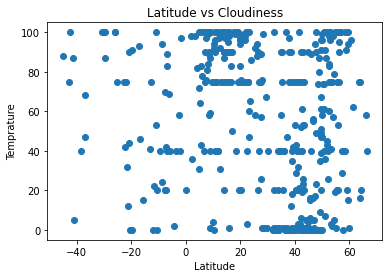

In [18]:
plt.scatter(cityDF["Lat"],cityDF["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Latitude vs Cloudiness")
file = os.path.join("Latitude_vs_Cloudiness.png")
plt.savefig(file)

## Latitude vs. Wind Speed Plot

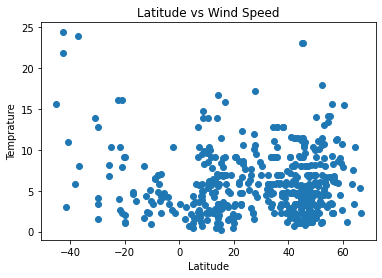

In [19]:
plt.scatter(cityDF["Lat"],cityDF["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Latitude vs Wind Speed")
file = os.path.join("Latitude_vs_Wind_Speed.png")
plt.savefig(file)

## Linear Regression

In [5]:
NorLatDF=cityDF[cityDF["Lat"]>=0]
SouLatDF=cityDF[cityDF["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

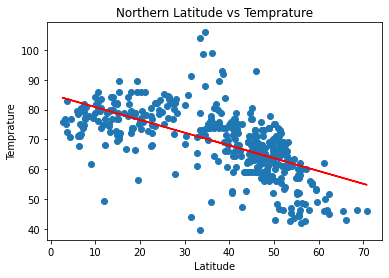

In [10]:
x_values = NorLatDF["Lat"]
y_values = NorLatDF['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NorLatDF["Lat"],NorLatDF['Max Temp'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Northern Latitude vs Temprature")


file = os.path.join("Northern_Latitude_vs_Temprature_lm.png")
plt.savefig(file)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

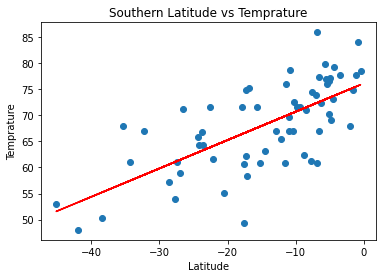

In [11]:
x_values = SouLatDF["Lat"]
y_values = SouLatDF['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SouLatDF["Lat"],SouLatDF['Max Temp'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Southern Latitude vs Temprature")


file = os.path.join("Southern Latitude vs Temprature_lm.png")
plt.savefig(file)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

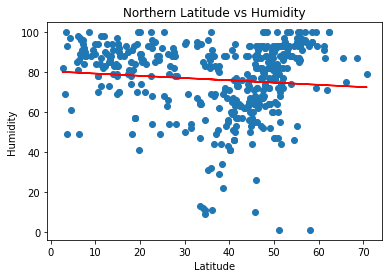

In [12]:
x_values = NorLatDF["Lat"]
y_values = NorLatDF['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NorLatDF["Lat"],NorLatDF['Humidity'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Latitude vs Humidity")


file = os.path.join("Northern_Latitude_vs_Humidity_lm.png")
plt.savefig(file)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

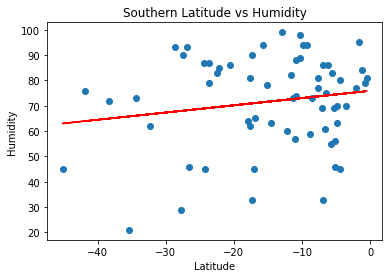

In [13]:
x_values = SouLatDF["Lat"]
y_values = SouLatDF['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SouLatDF["Lat"],SouLatDF['Humidity'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Latitude vs Humidity")


file = os.path.join("Southern_Latitude_vs_Humidity_lm.png")
plt.savefig(file)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

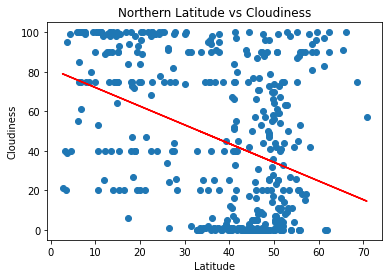

In [15]:
x_values = NorLatDF["Lat"]
y_values = NorLatDF['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NorLatDF["Lat"],NorLatDF['Cloudiness'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Latitude vs Cloudiness")


file = os.path.join("Northern_Latitude_vs_Cloudiness_lm.png")
plt.savefig(file)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

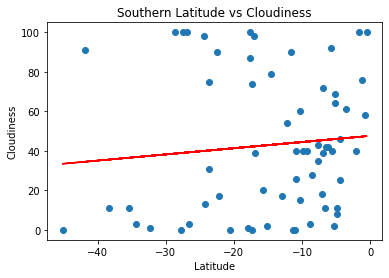

In [16]:
x_values = SouLatDF["Lat"]
y_values = SouLatDF['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SouLatDF["Lat"],SouLatDF['Cloudiness'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Latitude vs Cloudiness")


file = os.path.join("Southern_Latitude_vs_Cloudiness_lm.png")
plt.savefig(file)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

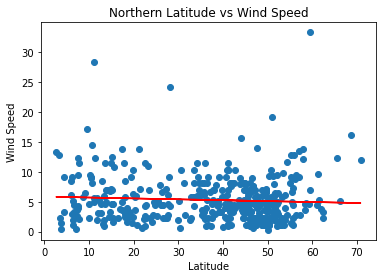

In [17]:
x_values = NorLatDF["Lat"]
y_values = NorLatDF['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NorLatDF["Lat"],NorLatDF['Wind Speed'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Latitude vs Wind Speed")


file = os.path.join("Northern_Latitude_vs_Wind_Speed_lm.png")
plt.savefig(file)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

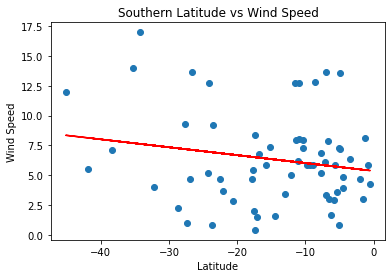

In [18]:
x_values = SouLatDF["Lat"]
y_values = SouLatDF['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SouLatDF["Lat"],SouLatDF['Wind Speed'])
plt.plot(x_values, regression_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Latitude vs Wind Speed")


file = os.path.join("Southern_Latitude_vs_Wind_Speed_lm.png")
plt.savefig(file)